In [1]:
# this notebook preprocesses the data to feed it to a forcasting model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/data_cleaned.csv")

In [4]:
data.head()

,country,date,infections,latitude,longitude,deaths,recovered,Continent,bed_occupancy,ICU_beds,Population,population_world,age_0_to_64,age_15_to_64,age_over_65,month,day
0,Japan,1/23/20,1,36.0,138.0,0,0,Asia,0.755,NaN,126010000.0,0.0162,0.129,0.601,0.27,1.0,23.0
1,Japan,1/24/20,2,36.0,138.0,0,0,Asia,0.755,NaN,126010000.0,0.0162,0.129,0.601,0.27,1.0,24.0
2,Japan,1/25/20,2,36.0,138.0,0,0,Asia,0.755,NaN,126010000.0,0.0162,0.129,0.601,0.27,1.0,25.0
3,Japan,1/26/20,4,36.0,138.0,0,1,Asia,0.755,NaN,126010000.0,0.0162,0.129,0.601,0.27,1.0,26.0
4,Japan,1/27/20,4,36.0,138.0,0,1,Asia,0.755,NaN,126010000.0,0.0162,0.129,0.601,0.27,1.0,27.0


In [5]:
data.shape

(67236, 17)

In [6]:
# dummy encode the 'Country' and 'Continent' columns
data = pd.concat([data, pd.get_dummies(data['country'])], axis=1).drop('country', axis=1)

In [7]:
data = pd.concat([data, pd.get_dummies(data['Continent'])], axis=1).drop('Continent', axis=1)

In [8]:
# drop the date and population column 
data = data.drop(['date', 'Population'], axis=1)

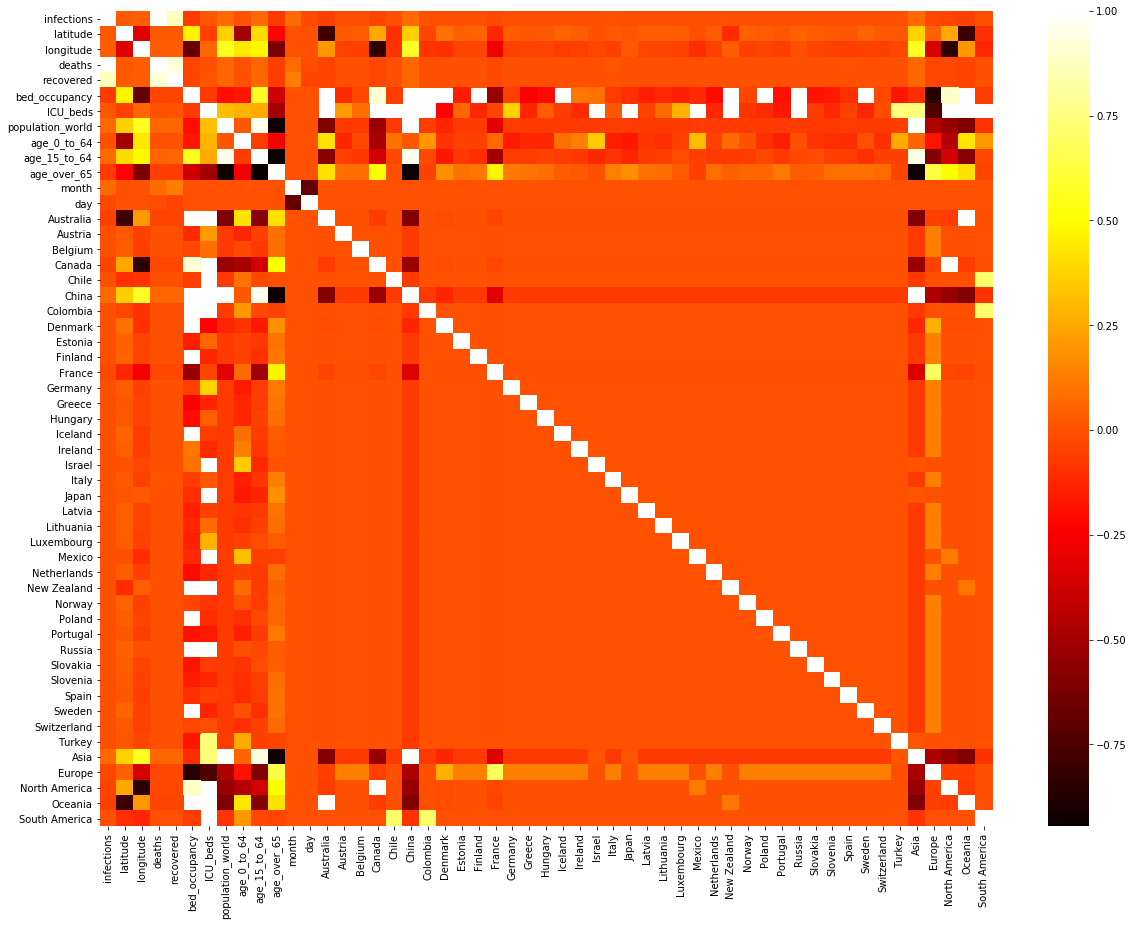

In [9]:
# visualize correlations between columns
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 15)
sns.heatmap(data.corr(), cmap='hot', ax=ax)

In [10]:
# bed_occupancy and ICU_beds contain NaNs values
# assumption: countries close to each other have similar hospital / medical capacity
# cluster based on latitude / longitude

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

In [34]:
imputer.fit(data[~data['bed_occupancy'].isnull()])

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=3, weights='uniform')

In [20]:
column_names = data.columns

In [35]:
imputer.transform(data[data['bed_occupancy'].isnull()])

KeyboardInterrupt: 